# Alter the land mask around Greenland

Remove ocean section around the southeast side of Greenland

In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import cmocean
import xarray as xr

%matplotlib inline

#### Parameters:

In [2]:
# domain dimensions:
jmin, jmax = 159, 799
imin, imax = 1139, 2179

In [3]:
land_color      = '#a9a7a2'
coastline_color = '#373736'

In [4]:
# Rimwidths:
rimwidthN  = 10
rimwidthS  = 10
rimwidthW  = 10
rimwidthE  = 20

# Boundary coordinates
bdy_NCB = (1599,2178,778,798) # Northern Canada Basin
bdy_WCB = (2168,2178,391,798) # Western Canada Basin
bdy_LS  = (1141,1151,447,673) # Baffin Bay
bdy_HB  = (1191,1473,292,302) # Hudson Bay

#### Load files:

In [5]:
ANHA12_mesh = nc.Dataset('/ocean/brogalla/GEOTRACES/data/ANHA12/ANHA12_mesh1.nc')
mesh_tmask  = np.array(ANHA12_mesh.variables['tmask'])[0,:,:,:]

In [31]:
ANHA12_mask = nc.Dataset('/ocean/brogalla/GEOTRACES/data/ANHA12/ANHA12_mask.nc')
nav_lon = np.array(ANHA12_mask.variables['nav_lon'])
nav_lat = np.array(ANHA12_mask.variables['nav_lat'])
tmask   = np.array(ANHA12_mask.variables['tmask'])[0,:,:,:]
umask   = np.array(ANHA12_mask.variables['umask'])[0,:,:,:]
vmask   = np.array(ANHA12_mask.variables['vmask'])[0,:,:,:]
fmask   = np.array(ANHA12_mask.variables['fmask'])[0,:,:,:]

#### Figure:

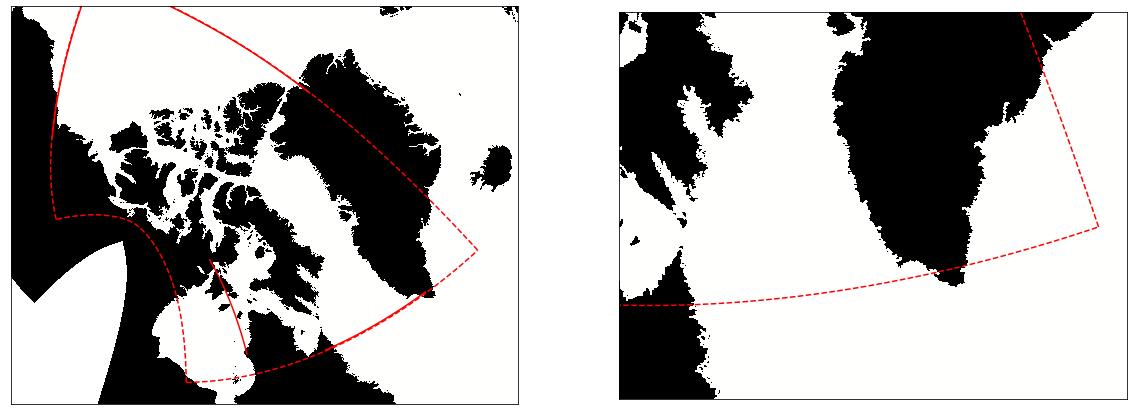

In [7]:
fig, ax = plt.subplots(1,2, figsize=(20,10))

#--- full domain ----
proj1            = Basemap(projection='stere',lat_0 = 72, lon_0 = -75, resolution='i', width=5.1e6, height=4.0e6, ax=ax[0])
x_model, y_model = proj1(nav_lon, nav_lat)
proj1.pcolormesh(x_model, y_model, tmask[0,:,:], cmap=cmocean.cm.gray)

# sub-domain dimensions:
proj1.plot(x_model[imin:imax,jmax], y_model[imin:imax,jmax], '--r')
proj1.plot(x_model[imin:imax,jmin], y_model[imin:imax,jmin], '--r')
proj1.plot(x_model[imin,jmin:jmax], y_model[imin,jmin:jmax], '--r') 
proj1.plot(x_model[imax,jmin:jmax], y_model[imax,jmin:jmax], '--r') 

# Boundaries:
proj1.plot(x_model[bdy_NCB[0]:bdy_NCB[1],bdy_NCB[3]], y_model[bdy_NCB[0]:bdy_NCB[1],bdy_NCB[3]], '-r') # Northern Canada Basin
proj1.plot(x_model[bdy_WCB[1],bdy_WCB[2]:bdy_WCB[3]], y_model[bdy_WCB[1],bdy_WCB[2]:bdy_WCB[3]] , '-r') # Western Canada Basin
proj1.plot(x_model[bdy_LS[0],bdy_LS[2]:bdy_LS[3]], y_model[bdy_LS[0],bdy_LS[2]:bdy_LS[3]]  ,'-r')  # Southern Baffin Bay  <-----
proj1.plot(x_model[bdy_HB[0]:bdy_HB[1],bdy_HB[2]] , y_model[bdy_HB[0]:bdy_HB[1],bdy_HB[2]] ,'-r')  # Hudson Bay BC

#--- zoom -----------
proj2            = Basemap(projection='stere',lat_0 = 63, lon_0 = -50, resolution='i', width=2.1e6, height=1.6e6, ax=ax[1])
x_model, y_model = proj2(nav_lon, nav_lat)
proj2.pcolormesh(x_model, y_model, mesh_tmask[0,:,:], cmap=cmocean.cm.gray)
# Boundaries:
proj2.plot(x_model[imin:imax,jmax], y_model[imin:imax,jmax], '--r')
proj2.plot(x_model[imin,jmin:jmax], y_model[imin,jmin:jmax], '--r') 
proj2.plot(x_model[bdy_HB[0]:bdy_HB[1],bdy_HB[2]] , y_model[bdy_HB[0]:bdy_HB[1],bdy_HB[2]]  ,'-r')
proj2.plot(x_model[bdy_HB[0]:bdy_HB[1],bdy_HB[3]] , y_model[bdy_HB[0]:bdy_HB[1],bdy_HB[3]]  ,'-r')

In [36]:
def mask_HudsonBay(variable):
    variable[:,imin-1:1500,80:291]    = 0
    variable[:,imin-30:1200,jmin:320] = 0
    return variable

In [37]:
def mask_EastGreenland(variable):
    variable[:,imin-1:1280,674:jmax+1] = 0
    return variable

In [38]:
new_tmask = mask_EastGreenland(mask_HudsonBay(tmask))
new_umask = mask_EastGreenland(mask_HudsonBay(umask))
new_vmask = mask_EastGreenland(mask_HudsonBay(vmask))
new_fmask = mask_EastGreenland(mask_HudsonBay(fmask))

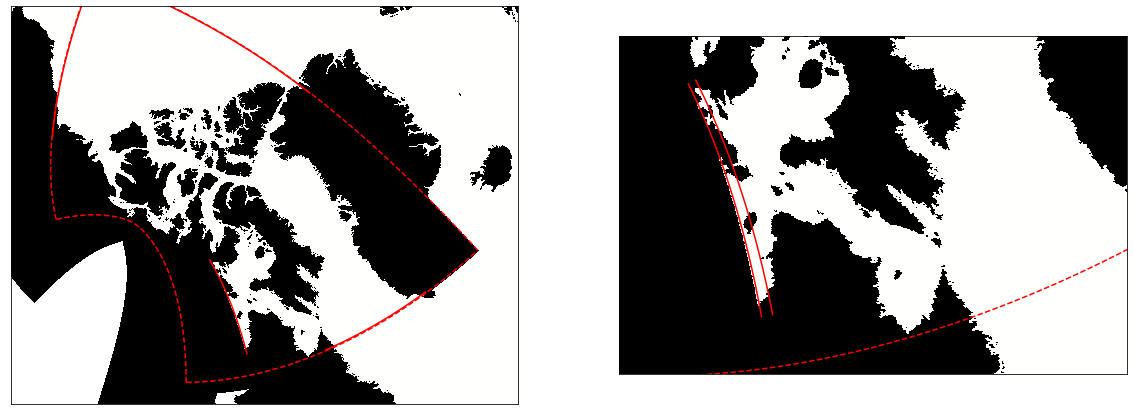

In [40]:
fig, ax = plt.subplots(1,2, figsize=(20,10))

#--- full domain ----
proj1            = Basemap(projection='stere',lat_0 = 72, lon_0 = -75, resolution='i', width=5.1e6, height=4.0e6, ax=ax[0])
x_model, y_model = proj1(nav_lon, nav_lat)
proj1.pcolormesh(x_model, y_model, new_tmask[0,:,:], cmap=cmocean.cm.gray)

# sub-domain dimensions:
proj1.plot(x_model[imin:imax,jmax], y_model[imin:imax,jmax], '--r')
proj1.plot(x_model[imin:imax,jmin], y_model[imin:imax,jmin], '--r')
proj1.plot(x_model[imin,jmin:jmax], y_model[imin,jmin:jmax], '--r') 
proj1.plot(x_model[imax,jmin:jmax], y_model[imax,jmin:jmax], '--r') 

# Boundaries:
proj1.plot(x_model[bdy_NCB[0]:bdy_NCB[1],bdy_NCB[3]], y_model[bdy_NCB[0]:bdy_NCB[1],bdy_NCB[3]], '-r') # Northern Canada Basin
proj1.plot(x_model[bdy_WCB[1],bdy_WCB[2]:bdy_WCB[3]], y_model[bdy_WCB[1],bdy_WCB[2]:bdy_WCB[3]] , '-r') # Western Canada Basin
proj1.plot(x_model[bdy_LS[0],bdy_LS[2]:bdy_LS[3]], y_model[bdy_LS[0],bdy_LS[2]:bdy_LS[3]]  ,'-r')  # Southern Baffin Bay  <-----
proj1.plot(x_model[bdy_HB[0]:bdy_HB[1],bdy_HB[2]] , y_model[bdy_HB[0]:bdy_HB[1],bdy_HB[2]] ,'-r')  # Hudson Bay BC

#--- zoom -----------
proj2            = Basemap(projection='stere',lat_0 = 63, lon_0 = -70, resolution='i', width=2.1e6, height=1.4e6, ax=ax[1])
x_model, y_model = proj2(nav_lon, nav_lat)
proj2.pcolormesh(x_model, y_model, new_tmask[0,:,:], cmap=cmocean.cm.gray)
# Boundaries:
proj2.plot(x_model[imin:imax,jmax], y_model[imin:imax,jmax], '--r')
proj2.plot(x_model[imin,jmin:jmax], y_model[imin,jmin:jmax], '--r') 
proj2.plot(x_model[bdy_HB[0]:bdy_HB[1],bdy_HB[2]] , y_model[bdy_HB[0]:bdy_HB[1],bdy_HB[2]]  ,'-r')
proj2.plot(x_model[bdy_HB[0]:bdy_HB[1],bdy_HB[3]] , y_model[bdy_HB[0]:bdy_HB[1],bdy_HB[3]]  ,'-r')

Write to file:

In [41]:
ANHA12_mask_new = nc.Dataset('/ocean/brogalla/GEOTRACES/data/ANHA12/ANHA12_mask_Pb-20230213.nc', 'r+')
ANHA12_mask_new['tmask'][0,:,:,:] = new_tmask
ANHA12_mask_new['umask'][0,:,:,:] = new_umask
ANHA12_mask_new['vmask'][0,:,:,:] = new_vmask
ANHA12_mask_new['fmask'][0,:,:,:] = new_fmask
ANHA12_mask_new.close()

Check:

In [25]:
ANHA12_mask_new = nc.Dataset('/ocean/brogalla/GEOTRACES/data/ANHA12/ANHA12_mask_Pb-20230209.nc')
tmask_read = np.array(ANHA12_mask_new.variables['tmask'][0,0,:,:])

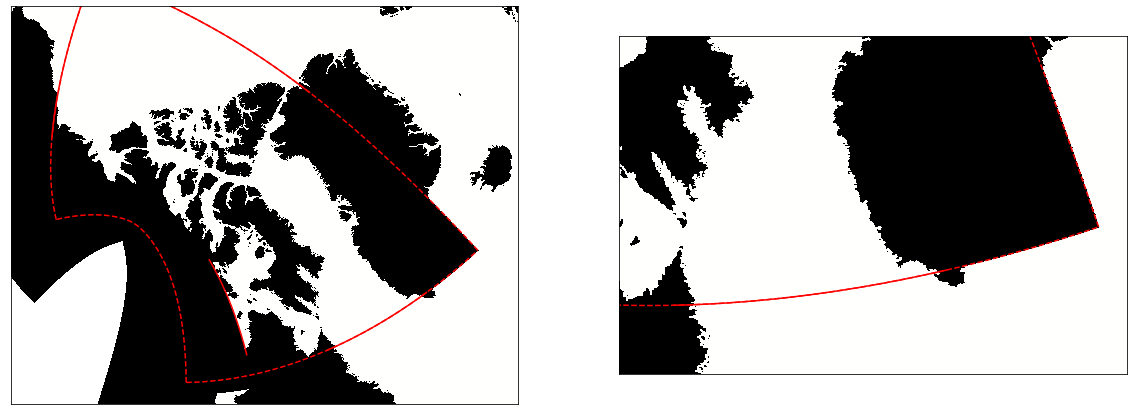

In [26]:
fig, ax = plt.subplots(1,2, figsize=(20,10))

#--- full domain ----
proj1            = Basemap(projection='stere',lat_0 = 72, lon_0 = -75, resolution='i', width=5.1e6, height=4.0e6, ax=ax[0])
x_model, y_model = proj1(nav_lon, nav_lat)
proj1.pcolormesh(x_model, y_model, tmask_read[:,:], cmap=cmocean.cm.gray)

# sub-domain dimensions:
proj1.plot(x_model[imin:imax,jmax], y_model[imin:imax,jmax], '--r')
proj1.plot(x_model[imin:imax,jmin], y_model[imin:imax,jmin], '--r')
proj1.plot(x_model[imin,jmin:jmax], y_model[imin,jmin:jmax], '--r') 
proj1.plot(x_model[imax,jmin:jmax], y_model[imax,jmin:jmax], '--r') 

# Boundaries:
proj1.plot(x_model[1600:imax,jmax], y_model[1600:imax,jmax], '-r') # Northern Canada Basin
proj1.plot(x_model[imax,391:jmax] , y_model[imax,391:jmax] , '-r') # Western Canada Basin
proj1.plot(x_model[imin,449:674]  , y_model[imin,449:674]  ,'-r')  # Southern Baffin Bay  <-----
proj1.plot(x_model[1189:1474,291] , y_model[1189:1474,291] ,'-r')  # Hudson Bay BC

#--- zoom -----------
proj2            = Basemap(projection='stere',lat_0 = 63, lon_0 = -50, resolution='i', width=2.1e6, height=1.4e6, ax=ax[1])
x_model, y_model = proj2(nav_lon, nav_lat)
proj2.pcolormesh(x_model, y_model, tmask_read[:,:], cmap=cmocean.cm.gray)
# Boundaries:
proj2.plot(x_model[imin:imax,jmax], y_model[imin:imax,jmax], '--r')
proj2.plot(x_model[imin,jmin:jmax], y_model[imin,jmin:jmax], '--r') 
proj2.plot(x_model[imin,449:674]  , y_model[imin,449:674]  ,'-r')